In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tickers = ['WIPRO.NS', 'ITC.NS', 'RELIANCE.NS', 'BAJFINANCE.NS', 'MARUTI.NS']
start_date = '2018-01-01'
end_date = '2023-12-31'

In [18]:
dfs = {}
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data.dropna(inplace=True)
    dfs[ticker] = data
print(dfs)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

{'WIPRO.NS': Price            Close        High         Low        Open    Volume
Ticker        WIPRO.NS    WIPRO.NS    WIPRO.NS    WIPRO.NS  WIPRO.NS
Date                                                                
2018-01-01  115.548195  116.807530  112.956530  113.704831   8934389
2018-01-02  116.332985  118.267612  114.781635  115.292670   7665379
2018-01-03  113.139038  116.953537  112.701013  116.953537   5860470
2018-01-04  113.759583  114.252363  112.226480  113.193793   3905556
2018-01-05  112.993027  114.580885  112.317735  114.252362   4301878
...                ...         ...         ...         ...       ...
2023-12-22  226.817932  228.607371  212.772039  213.409369  46080814
2023-12-26  230.470367  233.264830  219.807252  222.577208  54628644
2023-12-27  230.887085  233.068725  227.528814  229.685946  25262992
2023-12-28  230.151703  234.049246  229.269229  231.671491  16839956
2023-12-29  231.058670  233.044225  228.509337  230.887092  15961140

[1481 rows x 5 colum

In [19]:
target_ticker = 'RELIANCE.NS'
data = dfs[target_ticker].copy()
print(data)

Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
2018-01-01   408.875122   414.695312   407.863888   414.695312     9453202
2018-01-02   409.504333   413.279615   407.369510   410.335798     9499419
2018-01-03   411.144806   416.178505   410.358284   415.729051    13507800
2018-01-04   413.616699   414.290865   411.549289   412.650408     9008932
2018-01-05   414.942505   416.582962   413.594203   414.290840     7441284
...                 ...          ...          ...          ...         ...
2023-12-22  1282.525024  1290.449951  1273.824951  1279.800049    16541784
2023-12-26  1289.025024  1295.974976  1281.349976  1284.000000     7465664
2023-12-27  1293.425049  1299.949951  1286.550049  1291.000000     9204156
2023-12-28  1302.775024  1306.000000  1293.425049  1294.900024    12302636
2023-12-29  1292.474976  

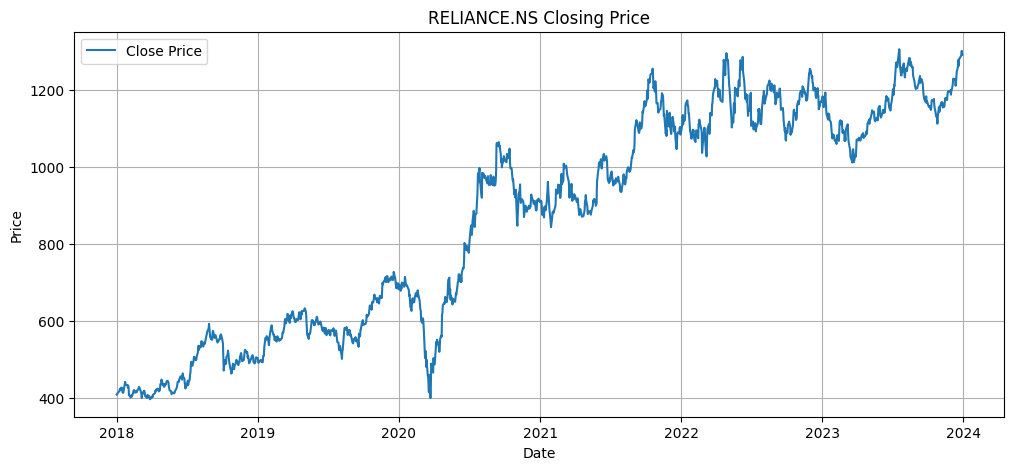

In [5]:
plt.figure(figsize=(12, 5))
plt.plot(data['Close'], label='Close Price')
plt.title(f'{target_ticker} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
data['Return']=data['Close'].pct_change()
data['Lag_1']=data['Close'].shift(1)
data['Lag_2']=data['Close'].shift(2)
data['Lag_3']=data['Close'].shift(3)
data['MA_5']=data['Close'].rolling(5).mean()
data['MA_10']=data['Close'].rolling(10).mean()
data['Volatility_5']=data['Return'].rolling(5).std()
data['Volume_Change']=data['Volume'].pct_change()
data.dropna(inplace=True)
print(data)

Price             Close         High          Low         Open      Volume  \
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS   
Date                                                                         
2018-01-12   426.515472   428.223343   421.684045   423.818869    15071161   
2018-01-15   426.582947   430.785181   424.807692   426.964987    11120925   
2018-01-16   414.807678   425.931252   413.481847   425.931252    10825151   
2018-01-17   415.504364   417.526832   407.639204   416.178530    13204016   
2018-01-18   413.347015   417.796433   411.279605   417.526778     9381821   
...                 ...          ...          ...          ...         ...   
2023-12-22  1282.525024  1290.449951  1273.824951  1279.800049    16541784   
2023-12-26  1289.025024  1295.974976  1281.349976  1284.000000     7465664   
2023-12-27  1293.425049  1299.949951  1286.550049  1291.000000     9204156   
2023-12-28  1302.775024  1306.000000  1293.425049  1294.900024  

In [22]:
arima_data=data['Close']
print(arima_data)
train_size=int(len(arima_data) * 0.8)
train_arima,test_arima=arima_data[:train_size],arima_data[train_size:]



Ticker      RELIANCE.NS
Date                   
2018-01-12   426.515472
2018-01-15   426.582947
2018-01-16   414.807678
2018-01-17   415.504364
2018-01-18   413.347015
...                 ...
2023-12-22  1282.525024
2023-12-26  1289.025024
2023-12-27  1293.425049
2023-12-28  1302.775024
2023-12-29  1292.474976

[1472 rows x 1 columns]


In [8]:
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [26]:
model=ARIMA(train_arima, order=(5,1,0))
model_fit=model.fit()
arima_forecast=model_fit.forecast(steps=len(test_arima))
arima_forecast.index=test_arima.index

In [27]:
features=['Lag_1', 'Lag_2', 'Lag_3', 'MA_5', 'MA_10', 'Volatility_5', 'Volume_Change']
X=data[features]
y=data['Close']
X_train,X_test=X[:train_size], X[train_size:]
y_train,y_test=y[:train_size], y[train_size:]

In [25]:
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)
gb_predictions = pd.Series(gb_model.predict(X_test), index=y_test.index)

In [28]:
actual_prices=y_test
arima_pred=arima_forecast.loc[actual_prices.index]
gb_pred=gb_predictions.loc[actual_prices.index]

In [13]:
common_idx=actual_prices.dropna().index.intersection(arima_pred.index).intersection(gb_pred.index)
actual=actual_prices.loc[common_idx]
arima_pred=arima_pred.loc[common_idx]
gb_pred=gb_pred.loc[common_idx]

In [29]:
def evaluate(y_true, y_pred):
    rmse=np.sqrt(mean_squared_error(y_true, y_pred))
    mae=mean_absolute_error(y_true, y_pred)
    mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

In [30]:
arima_rmse,arima_mae,arima_mape=evaluate(actual, arima_pred)
gb_rmse,gb_mae,gb_mape=evaluate(actual, gb_pred)

In [32]:
print("Model Evaluation")
print("ARIMA:")
print(f"  RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}")
print("Gradient Boosting:")
print(f"  RMSE: {gb_rmse:.4f}, MAE: {gb_mae:.4f}")


Model Evaluation
ARIMA:
  RMSE: 68.4286, MAE: 55.6585
Gradient Boosting:
  RMSE: 14.9519, MAE: 11.3416


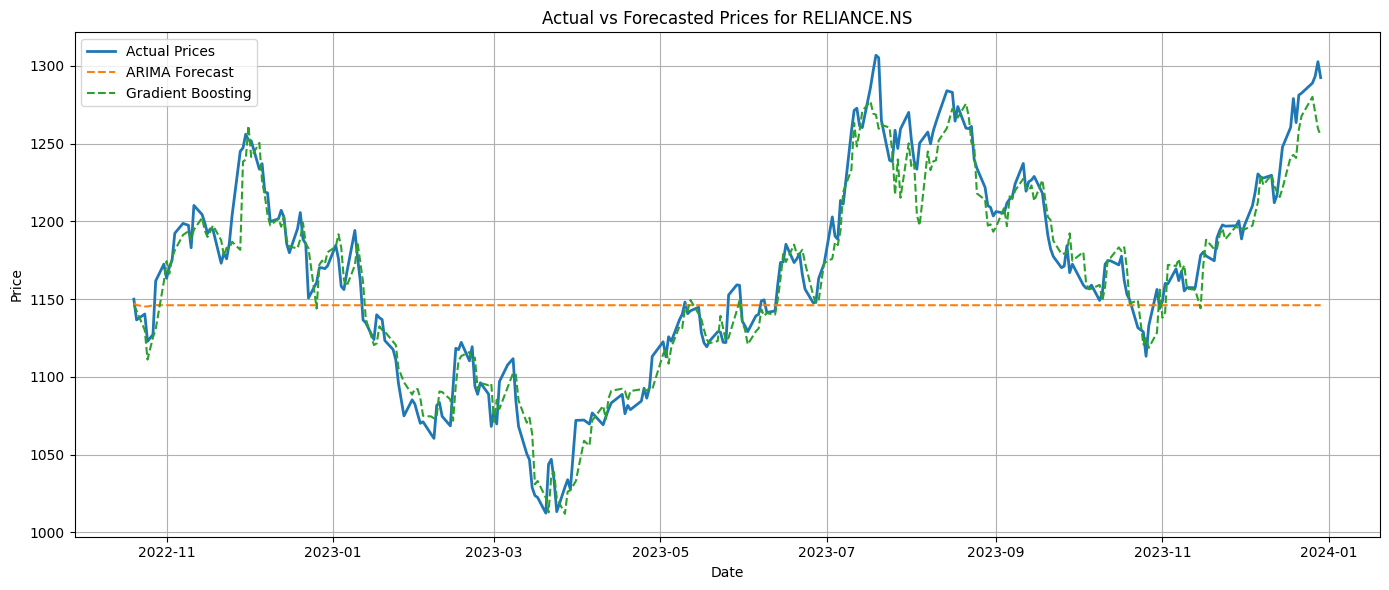

In [33]:
plt.figure(figsize=(14, 6))
plt.plot(actual, label='Actual Prices', linewidth=2)
plt.plot(arima_pred, label='ARIMA Forecast', linestyle='--')
plt.plot(gb_pred, label='Gradient Boosting', linestyle='--')
plt.title(f"Actual vs Forecasted Prices for {target_ticker}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()